<a href="https://colab.research.google.com/github/pejmanrasti/From_Shallow_to_Deep/blob/main/04_clustring_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code, we provided a short color analysis and image segmentation. Here's a breakdown of what the code does:

**1. Color Histogram Visualization**


**2. Image Segmentation**

  

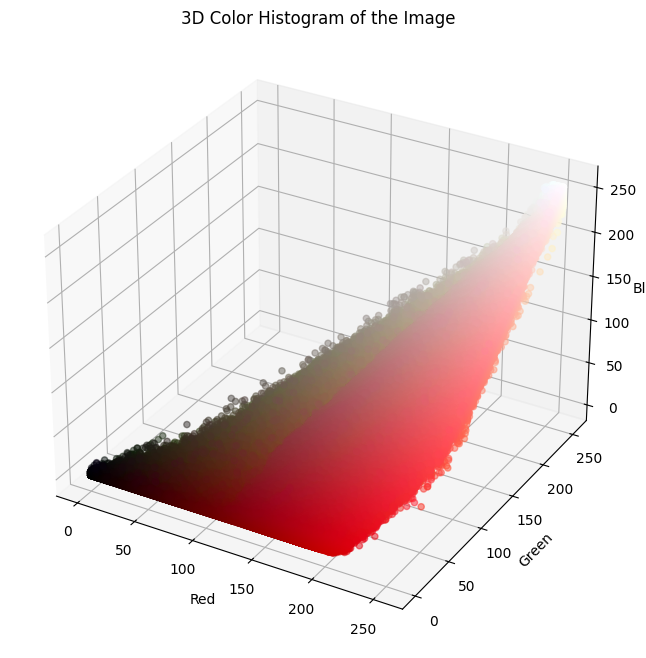

In [21]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_color_histogram(image_url):
  """
  Downloads an image from a URL, converts it to RGB, and plots a 3D color histogram
  of its pixel colors without any clustering.

  Args:
    image_url: The URL of the image to process.
  """
  try:
    # Download and open the image
    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes
    image = Image.open(BytesIO(response.content))
    image = image.convert('RGB')
    image_array = np.array(image)

    # Reshape the image array to get a list of pixels
    pixels = image_array.reshape((-1, 3))

    # Create the 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each pixel in the RGB space
    ax.scatter(pixels[:, 0], pixels[:, 1], pixels[:, 2], c=pixels / 255.0, marker='o', alpha=0.5)

    # Set labels and title
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title('3D Color Histogram of the Image')

    plt.show()

  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
  except Exception as e:
    print(f"An error occurred: {e}")

# Example usage with a placeholder image URL
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Tomato_je.jpg/1200px-Tomato_je.jpg"  # Replace with a real image URL if needed
plot_3d_color_histogram(image_url)

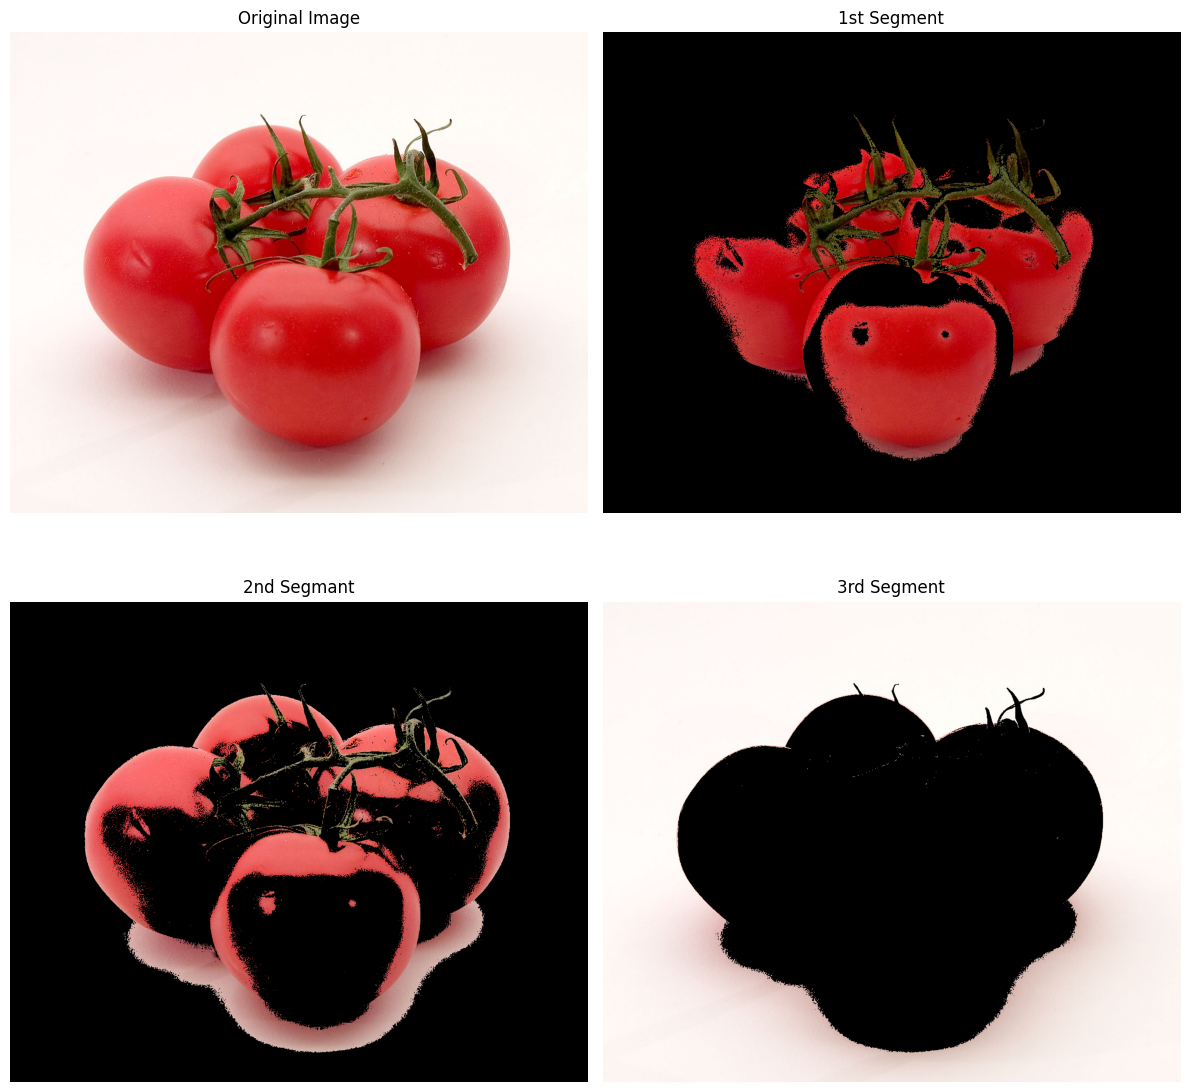

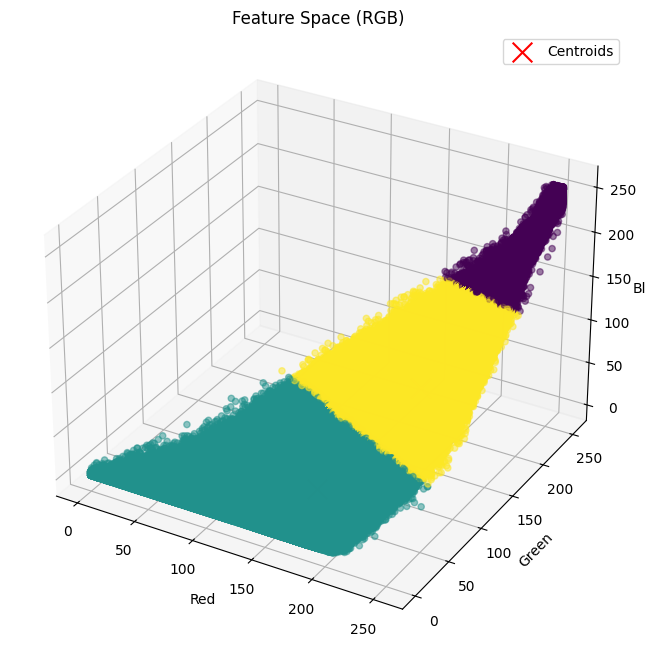

In [19]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def segment_tomato_image(image_url):
  """
  Reads an image from a URL, segments it into tomato, leaves, and background using k-means clustering,
  and displays the segmented images along with a feature space plot.

  Args:
    image_url: The URL of the image to process.
  """
  try:
    # Download and open the image
    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes
    image = Image.open(BytesIO(response.content))
    image = image.convert('RGB')
    image_array = np.array(image)

    # Reshape the image array for k-means clustering
    pixels = image_array.reshape((-1, 3))

    # Apply k-means clustering (k=3 for tomato, leaves, background)
    kmeans = KMeans(n_clusters=3, n_init='auto')
    kmeans.fit(pixels)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Create segmented images
    segmented_images = {
        "tomato": np.zeros_like(pixels),
        "leaves": np.zeros_like(pixels),
        "background": np.zeros_like(pixels),
    }

    # Determine which cluster corresponds to tomato, leaves, and background based on centroid color
    # Enhanced logic to identify tomato based on a range of red colors

    # Calculate the 'redness' of each centroid (R - (G + B))
    redness = centroids[:, 0] - (centroids[:, 1] + centroids[:, 2])

    #Find the most red centroid
    tomato_centroid_index = np.argmax(redness)

    # Exclude tomato centroid when finding leaves and background
    remaining_centroids_indices = [i for i in range(len(centroids)) if i != tomato_centroid_index]
    remaining_centroids = centroids[remaining_centroids_indices]

    # Identify leaves and background by looking at how green the centroids are.
    greenness = remaining_centroids[:, 1] - (remaining_centroids[:, 0] + remaining_centroids[:, 2])

    leaves_centroid_index_local = np.argmax(greenness)
    background_centroid_index_local = np.argmin(greenness)

    leaves_centroid_index = remaining_centroids_indices[leaves_centroid_index_local]
    background_centroid_index = remaining_centroids_indices[background_centroid_index_local]


    # Assign pixels to segmented images
    for i in range(len(labels)):
      if labels[i] == tomato_centroid_index:
        segmented_images["tomato"][i] = pixels[i]
      elif labels[i] == leaves_centroid_index:
        segmented_images["leaves"][i] = pixels[i]
      else:
        segmented_images["background"][i] = pixels[i]

    # Reshape the segmented images back to the original image shape
    segmented_images["tomato"] = segmented_images["tomato"].reshape(image_array.shape)
    segmented_images["leaves"] = segmented_images["leaves"].reshape(image_array.shape)
    segmented_images["background"] = segmented_images["background"].reshape(image_array.shape)

    # Display the original and segmented images
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes[0, 0].imshow(image_array)
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis('off')
    axes[0, 1].imshow(segmented_images["tomato"])
    axes[0, 1].set_title("1st Segment")
    axes[0, 1].axis('off')
    axes[1, 0].imshow(segmented_images["leaves"])
    axes[1, 0].set_title("2nd Segmant")
    axes[1, 0].axis('off')
    axes[1, 1].imshow(segmented_images["background"])
    axes[1, 1].set_title("3rd Segment")
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

    # Display the feature space plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pixels[:, 0], pixels[:, 1], pixels[:, 2], c=labels, cmap='viridis', alpha=0.5)
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200, label='Centroids')
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title('Feature Space (RGB)')
    ax.legend()
    plt.show()

  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
  except Exception as e:
    print(f"An error occurred: {e}")

# Example usage with a placeholder image URL
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Tomato_je.jpg/1200px-Tomato_je.jpg"  # Replace with a real tomato image URL
segment_tomato_image(image_url)